In [35]:
import pandas as pd # type: ignore
from pandasql import sqldf # type: ignore
import seaborn as sns
import matplotlib.pyplot as plt
pysqldf = lambda q: sqldf(q, globals())

In [36]:
df = pd.read_csv('C:/Users/Maayan/Documents/project/athlete_events.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Exporting csv that each row has at least one null

In [38]:
query = """
SELECT
    *
FROM
    df
WHERE
    ID IS NULL OR
    Name IS NULL OR
    Sex IS NULL OR
    Age IS NULL OR
    Height IS NULL OR
    Weight IS NULL OR
    Team IS NULL OR
    NOC IS NULL OR
    Games IS NULL OR
    Year IS NULL OR
    Season IS NULL OR
    City IS NULL OR
    Sport IS NULL OR
    Event IS NULL OR
    Medal IS NULL
"""

# Execute the query
result = pysqldf(query)

# Define the output CSV file path
output_csv_path = r'C:\Users\Maayan\Documents\project\missing_values.csv'

# Export the result to a CSV file
result.to_csv(output_csv_path, index=False)

Data Cleaning

In [39]:
query = """
SELECT
    ROUND(AVG(Age)) AS avg_age
FROM
    df
WHERE
    Age IS NOT NULL
"""

# Execute the query to get the average age
avg_age_df = pysqldf(query)
avg_age = avg_age_df.iloc[0]['avg_age']

# Fill missing Age values with the calculated average age
df['Age'].fillna(avg_age, inplace=True)

C:\Users\Maayan\AppData\Local\Temp\ipykernel_36316\1608282338.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(avg_age, inplace=True)


In [40]:
query = """
SELECT
    AVG(Height) AS avg_height
FROM
    df
WHERE
    Height IS NOT NULL
"""

# Execute the query to get the average height
avg_height_df = pysqldf(query)
avg_height = avg_height_df.iloc[0]['avg_height']

# Fill missing Height values with the calculated average height
df['Height'].fillna(avg_height, inplace=True)

C:\Users\Maayan\AppData\Local\Temp\ipykernel_36316\842641899.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height'].fillna(avg_height, inplace=True)


In [41]:
query = """
SELECT
    AVG(Weight) AS avg_weight
FROM
    df
WHERE
    Weight IS NOT NULL
"""

# Execute the query to get the average weight
avg_weight_df = pysqldf(query)
avg_weight = avg_weight_df.iloc[0]['avg_weight']

# Fill missing Height values with the calculated average weight
df['Weight'].fillna(avg_weight, inplace=True)

C:\Users\Maayan\AppData\Local\Temp\ipykernel_36316\1586620607.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna(avg_weight, inplace=True)


In [42]:
query = """
SELECT
    Team
FROM
    df
WHERE
    Team LIKE '%-%'
"""
pysqldf(query)

,Team
0,Thessalonki-1
1,Japan-1
2,Japan-1
3,Japan-1
4,France-1
...,...
6202,Russia-1
6203,Switzerland-1
6204,Russia-2
6205,Russia-1


In [43]:
df['Team'] = df['Team'].str.replace(r'-\d+', '', regex=True) #actively changing the dataframe!

In [44]:
query = """
SELECT
    Team
FROM
    df
WHERE
    Team LIKE '%-%'
"""
pysqldf(query)

,Team
0,Ali-Baba II
1,Wolseley-Siddeley
2,Pettit-Poucet
3,Siames-Cat
4,Ali-Baba II
...,...
104,Willem-Six
105,Berliner Ruderclub Sport-Borussia
106,Berliner Ruderclub Sport-Borussia
107,Wolseley-Siddeley


In [45]:
df.drop('NOC', axis=1, inplace=True)
df.drop('Games', axis=1, inplace=True)
df['Medal'].fillna('No Medal', inplace=True)

C:\Users\Maayan\AppData\Local\Temp\ipykernel_36316\2818438777.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medal'].fillna('No Medal', inplace=True)


In [46]:
# Define the output CSV file path
output_csv_path = r'C:\Users\Maayan\Documents\project\cleaned_dataset.csv'

# Export the result to a CSV file
df.to_csv(output_csv_path, index=False)

#Attaching the df to the new cleaned dataset
df = pd.read_csv('C:/Users/Maayan/Documents/project/cleaned_dataset.csv')

Analysis

In [47]:
query = """
SELECT
    *
FROM
    df
"""
pysqldf(query)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00000,89.000000,Poland,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal
271112,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal
271113,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00000,96.000000,Poland,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal


Data Exploration

In [48]:
query = """
SELECT
    AVG(Age) AS `Average Age`,
    MIN(Age) AS `Minimum Age`,
    MAX(Age) AS `Maximum Age`
FROM
    df
"""
pysqldf(query)

,Average Age,Minimum Age,Maximum Age
0,25.572382,10.0,97.0


In [49]:
query = """
SELECT
    AVG(Height) AS `Average Height`,
    MIN(Height) AS `Minimum Height`,
    MAX(Height) AS `Maximum Height`
FROM
    df
"""
pysqldf(query)

,Average Height,Minimum Height,Maximum Height
0,175.33897,127.0,226.0


In [50]:
query = """
SELECT
    AVG(Weight) AS `Average Weight`,
    MIN(Weight) AS `Minimum Weight`,
    MAX(Weight) AS `Maximum Weight`
FROM
    df
"""
pysqldf(query)

,Average Weight,Minimum Weight,Maximum Weight
0,70.702393,25.0,214.0


In [51]:
query = """
SELECT 
    SUM(CASE WHEN Sex = 'M' THEN 1 ELSE 0 END) AS `Male Amount`,
    SUM(CASE WHEN Sex = 'F' THEN 1 ELSE 0 END) AS `Female Amount`
FROM
    df
"""
pysqldf(query)

,Male Amount,Female Amount
0,196594,74522


In [52]:
query = """
SELECT 
    Team,
    COUNT(*) as `Amount of Competitors`
FROM
    df
GROUP BY Team
ORDER BY `Amount of Competitors` DESC
LIMIT 10
"""
pysqldf(query)

,Team,Amount of Competitors
0,United States,18469
1,France,12258
2,Great Britain,11810
3,Italy,10573
4,Germany,9673
5,Canada,9606
6,Japan,8423
7,Sweden,8152
8,Australia,7596
9,Hungary,6579


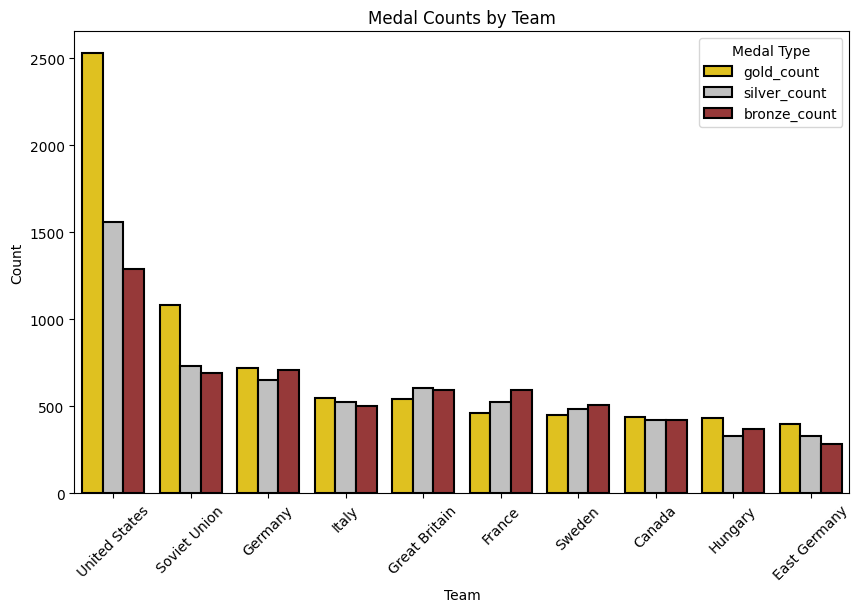

In [53]:
query = """
SELECT
    Team,
    SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS gold_count,
    SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS silver_count,
    SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS bronze_count
FROM
    df
WHERE
    Medal = 'Gold' OR
    Medal = 'Silver' OR
    Medal = 'Bronze'
GROUP BY
    Team
ORDER BY
    gold_count DESC,
    silver_count DESC,
    bronze_count DESC
LIMIT 10
"""
pysqldf(query)
pysqldf(query).to_csv(r'C:\Users\Maayan\Documents\project\plot1.csv', index=False)

# Load the data from the CSV file
plot1_df = pd.read_csv('C:/Users/Maayan/Documents/project/plot1.csv')

# Melt the DataFrame to make it suitable for plotting
test_df_melted = plot1_df.melt(id_vars='Team', var_name='Medal', value_name='Count')

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Team', y='Count', hue='Medal', data=test_df_melted, palette=['gold', 'silver', 'brown'])

for bar in bars.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)
    
plt.xticks(rotation=45)
plt.title('Medal Counts by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(title='Medal Type')

# Show the plot
plt.show()


In [54]:
query = """
SELECT
    AVG(CASE WHEN Medal = 'Gold' THEN Age ELSE NULL END) AS average_age_gold_winners,
    AVG(CASE WHEN Medal = 'Silver' THEN Age ELSE NULL END) AS average_age_silver_winners,
    AVG(CASE WHEN Medal = 'Bronze' THEN Age ELSE NULL END) AS average_age_bronze_winners,
    AVG(CASE WHEN Medal = 'No Medal' THEN Age ELSE NULL END) AS average_age_no_medal,
    AVG(age) as average_general_age,
    MAX(age),
    MIN(age)
FROM
    df
"""
pysqldf(query)

,average_age_gold_winners,average_age_silver_winners,average_age_bronze_winners,average_age_no_medal,average_general_age,MAX(age),MIN(age)
0,25.902109,25.996798,25.881835,25.511475,25.572382,97.0,10.0


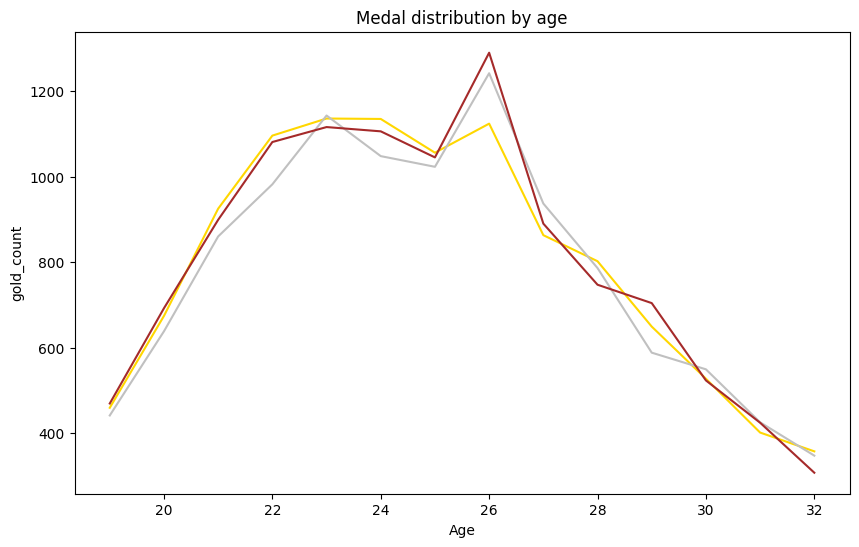

In [55]:
query = """
SELECT
    Age,
    SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS gold_count,
    SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS silver_count,
    SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS bronze_count,
    SUM(CASE WHEN Medal = 'No Medal' THEN 1 ELSE 0 END) as no_medal_count
FROM
    df
WHERE (Age >= 19 AND Age <= 32)
GROUP BY Age
"""
pysqldf(query)
pysqldf(query).to_csv(r'C:\Users\Maayan\Documents\project\plot2.csv', index=False)

# Load the data from the CSV file
plot2_df = pd.read_csv('C:/Users/Maayan/Documents/project/plot2.csv')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='gold_count', data=plot2_df, color='gold')
sns.lineplot(x='Age', y='silver_count', data=plot2_df, color='silver')
sns.lineplot(x='Age', y='bronze_count', data=plot2_df, color='brown')
plt.title('Medal distribution by age')
plt.xlabel('Age')
plt.ylabel('gold_count')
plt.show()


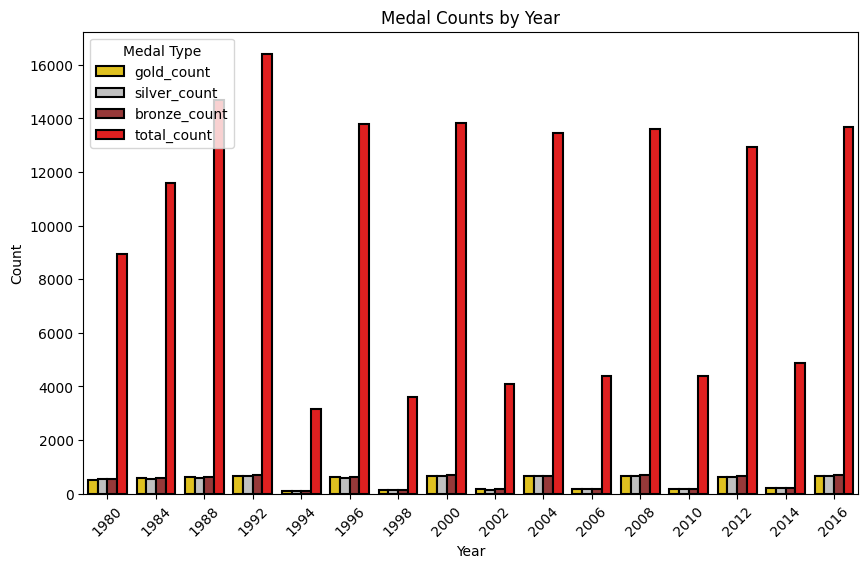

In [56]:
query = """
SELECT
    Year,
    SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS gold_count,
    SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS silver_count,
    SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS bronze_count,
    SUM(CASE WHEN Medal = 'Gold' OR Medal = 'Silver' OR Medal = 'Bronze' OR Medal = 'No Medal' THEN 1 ELSE 0 END) as total_count
FROM
    df
WHERE
    Year >= 1980 AND YEAR <= 2016
GROUP BY Year
"""
pysqldf(query)
pysqldf(query).to_csv(r'C:\Users\Maayan\Documents\project\plot4.csv', index=False)

# Load the data from the CSV file
plot4_df = pd.read_csv('C:/Users/Maayan/Documents/project/plot4.csv')

# Melt the DataFrame to make it suitable for plotting
plot4_df_melted = plot4_df.melt(id_vars='Year', value_vars=['gold_count', 'silver_count', 'bronze_count', 'total_count'], var_name='Medal', value_name='Count')

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Year', y='Count', hue='Medal', data=plot4_df_melted, palette=['gold', 'silver', 'brown', 'red'])

for bar in bars.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)
    
plt.xticks(rotation=45)
plt.title('Medal Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Medal Type')

# Show the plot
plt.show()


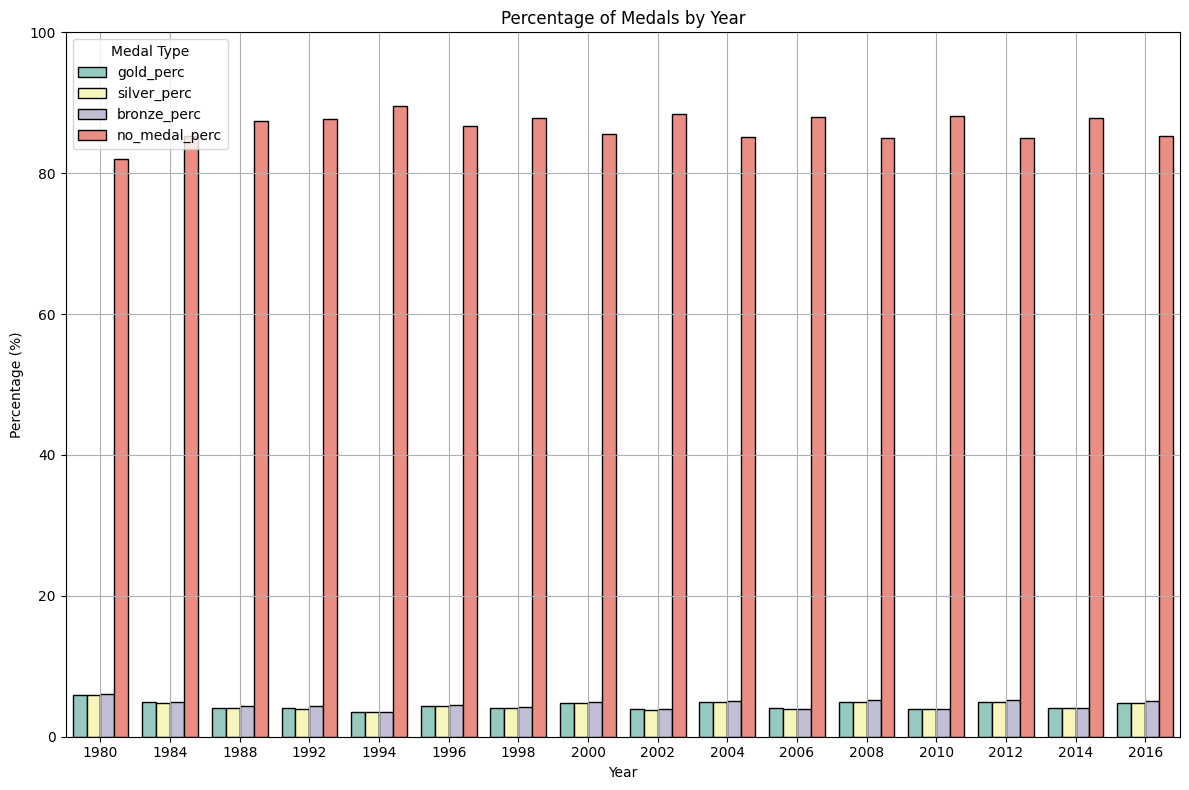

In [57]:
query = """
WITH medal_counts AS(
SELECT
    Year,
    SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS gold_count,
    SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS silver_count,
    SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS bronze_count,
    SUM(CASE WHEN Medal = 'No Medal' THEN 1 ELSE 0 END) AS no_medal_count,
    SUM(CASE WHEN Medal = 'Gold' OR Medal = 'Silver' OR Medal = 'Bronze' OR Medal = 'No Medal' THEN 1 ELSE 0 END) as total_count
FROM
    df
GROUP BY Year
)
SELECT
    Year,
    (CAST(gold_count AS FLOAT) / total_count) * 100 AS gold_perc,
    (CAST(silver_count AS FLOAT) / total_count) * 100 AS silver_perc,
    (CAST(bronze_count AS FLOAT) / total_count) * 100 AS bronze_perc,
    (CAST(no_medal_count AS FLOAT) / total_count) * 100 AS no_medal_perc
FROM
    medal_counts
WHERE
    Year >= 1980 AND YEAR <= 2016
"""
pysqldf(query)
pysqldf(query).to_csv(r'C:\Users\Maayan\Documents\project\plot3.csv', index=False)

# Load data into DataFrame
plot3_df = pd.read_csv(r'C:\Users\Maayan\Documents\project\plot3.csv')

# Melt DataFrame to long format for plotting stacked bars
plot3_df_melted = pd.melt(plot3_df, id_vars='Year', var_name='Medal', value_name='Percentage')

# Plotting a stacked bar chart with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Percentage', hue='Medal', data=plot3_df_melted, palette='Set3', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Medals by Year')
plt.legend(title='Medal Type', loc='upper left')
plt.ylim(0, 100)

plt.grid(True)  # Optional: Add gridlines for better readability

plt.tight_layout()
plt.show()

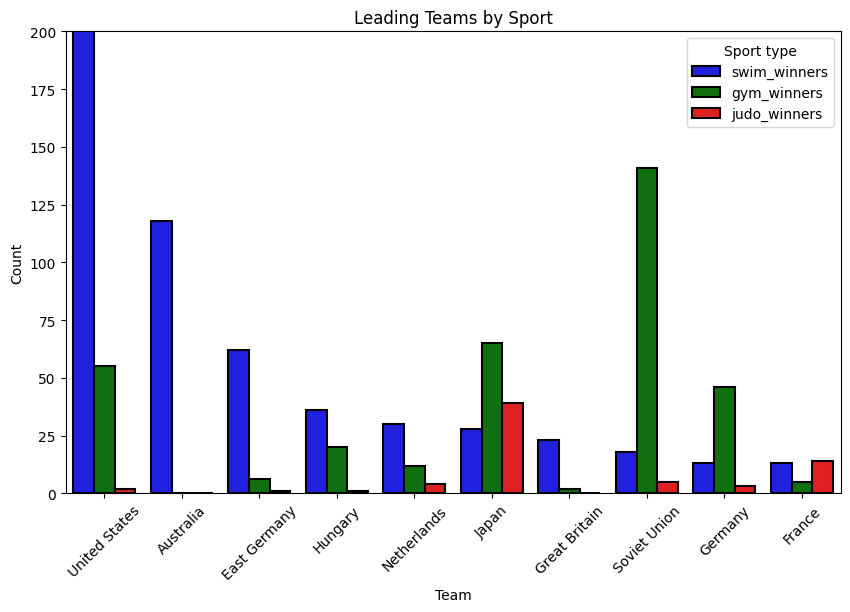

In [58]:
query = """
SELECT
    Team,
    SUM(CASE WHEN (Medal = 'Gold' AND Sport = 'Swimming') THEN 1 ELSE 0 END) AS swim_winners
    ,SUM(CASE WHEN (Medal = 'Gold' AND Sport = 'Gymnastics') THEN 1 ELSE 0 END) AS gym_winners
    ,SUM(CASE WHEN (Medal = 'Gold' AND Sport = 'Judo') THEN 1 ELSE 0 END) AS judo_winners
FROM
    df
GROUP BY Team
ORDER BY swim_winners DESC
LIMIT 10
"""
pysqldf(query)
pysqldf(query).to_csv(r'C:\Users\Maayan\Documents\project\plot5.csv', index=False)

# Load the data from the CSV file
plot5_df = pd.read_csv('C:/Users/Maayan/Documents/project/plot5.csv')

# Melt the DataFrame to make it suitable for plotting
plot5_df_melted = plot5_df.melt(id_vars='Team', value_vars=['swim_winners', 'gym_winners', 'judo_winners'], var_name='Sport', value_name='Count')

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Team', y='Count', hue='Sport', data=plot5_df_melted, palette=['blue', 'green', 'red'])

for bar in bars.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)
    
plt.xticks(rotation=45)
plt.title('Leading Teams by Sport')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(title='Sport type')
plt.ylim(0, 200)

# Show the plot
plt.show()